In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os
import math

# Data processing

## Load image

In [2]:
data_dir = '/Users/cengyuchen/办公/课程/Wisconsin/2019fall/992'

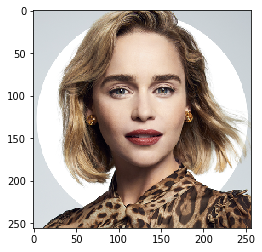

In [3]:
por = Image.open(os.path.join(data_dir,'000011.png')).resize([256,256])
plt.imshow(por)

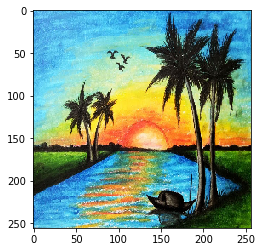

In [4]:
sce = Image.open(os.path.join(data_dir,'000007.jpg')).resize([256,256])
plt.imshow(sce)

# Question 1: Apply histogram equalization to grayscale images

## Get gray-scale image and corresponding array

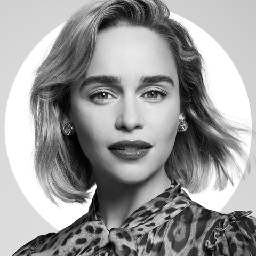

In [5]:
por.convert('L')#transform to gray-scale image

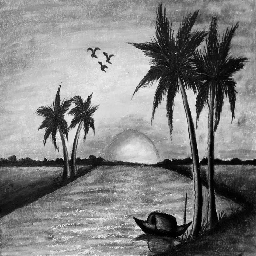

In [6]:
sce.convert('L')#transform to gray-scale image

## Pick the transport map according to the lecture note

In [7]:
def OTmap(x,ori): 
    #x:  the value of one certain point the pixel matrix; ori: the pixel matrix
    musum = ori[ori <= x].shape[0]/np.prod(ori.shape)
    return math.floor(256*musum)

## Apply the transport plan

In [8]:
por1 = np.array(por.convert('L'))
por2 = np.array([OTmap(x,por1) for x in por1.reshape(-1)]).reshape(256,256)

In [9]:
por1 = np.array(por.convert('L'))
por2 = np.asarray(por2, dtype=np.uint8)

## The intensity histograms for the original image and the edited image

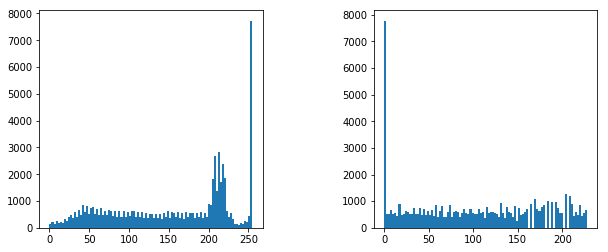

In [10]:
t = plt.subplots(ncols = 2, figsize = (10,4))
ax_list = list(t[1])

ax_list[0].hist(por1.reshape(-1), bins=100)  
ax_list[1].hist(por2.reshape(-1), bins= 100)

plt.subplots_adjust(wspace=0.5)

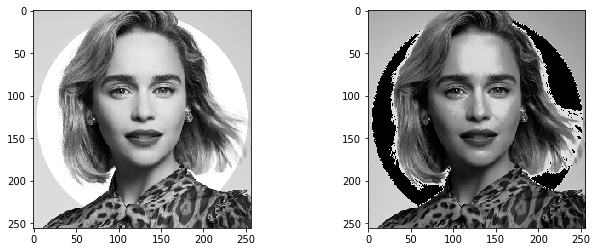

In [11]:
fig, ax_list = plt.subplots(ncols = 2, figsize = (10,4))

ax_list[0].imshow(Image.fromarray(por1, 'L'))
ax_list[1].imshow(Image.fromarray(por2, 'L'))

plt.subplots_adjust(wspace=0.5)

In [12]:
sce1 = np.array(sce.convert('L'))
sce2 = np.array([OTmap(x,sce1) for x in sce1.reshape(-1)]).reshape(256,256)

In [13]:
sce2 = np.asarray(sce2, dtype=np.uint8)

## The intensity histograms for the original image and the edited image

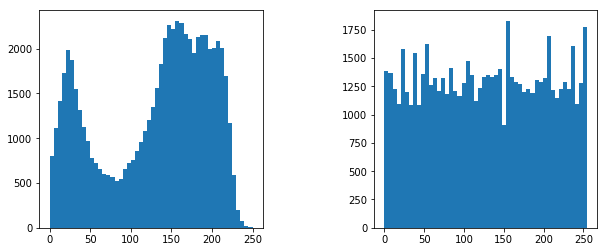

In [35]:
t = plt.subplots(ncols = 2, figsize = (10,4))
ax_list = list(t[1])

ax_list[0].hist(sce1.reshape(-1), bins=50)  # arguments are passed to np.histogram
ax_list[1].hist(sce2.reshape(-1), bins=50)

plt.subplots_adjust(wspace=0.5)

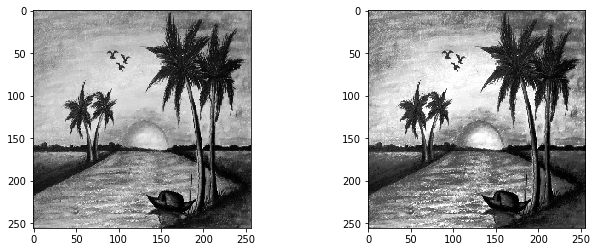

In [15]:
fig, ax_list = plt.subplots(ncols = 2, figsize = (10,4))

ax_list[0].imshow(Image.fromarray(sce1, 'L'))
ax_list[1].imshow(Image.fromarray(sce2, 'L'))

plt.subplots_adjust(wspace=0.5)

# Question 2: Knotte's map in RGB image

In [19]:
por_col = np.asarray(por)  ###  !!!  as array not array, don't know why

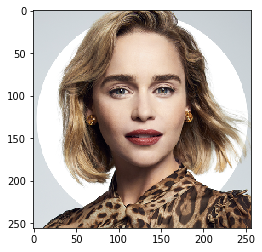

In [20]:
plt.imshow(Image.fromarray(por_col,'RGB'))

In [21]:
def OTmap_inte1(y,x,ori,cond): 
    ori = ori[cond == x]
    musum = ori[ori <= y].shape[0]/ori.shape[0]
    return math.floor(256*musum)

def OTmap_inte2(z,y,x,ori,cond2,cond): 
    
    ori = ori[(cond == x) & (cond2 == y)]
    musum = ori[ori <= z].shape[0]/ori.shape[0]
    return math.floor(256*musum)

def OTmap_syn(ori, order): 
    # ori: the pixel matrix of the image; order: the order to index the RGB coordinates
    ori1 = ori[:,:,order[0]]
    ori2 = ori[:,:,order[1]]
    ori3 = ori[:,:,order[2]]
    re1 = np.array([OTmap(x,ori1) for x in ori1.reshape(-1)]).reshape(256,256)
    re2 = np.array([OTmap_inte1(y,x,ori2,ori1) for (y,x) in zip(ori2.reshape(-1),ori1.reshape(-1))]).reshape(256,256)
    re3 = np.array([OTmap_inte2(z,y,x,ori3,ori2,ori1) for (z,y,x) in 
                    zip(ori3.reshape(-1),ori2.reshape(-1),ori1.reshape(-1))]).reshape(256,256)
    re = np.zeros(ori.shape)
    re[:,:,order[0]] = re1
    re[:,:,order[1]] = re2
    re[:,:,order[2]] = re3
    return re

Here we tried all the orders and see the result.

In [22]:
por_col_edit_012 = np.asarray(OTmap_syn(por_col,(0,1,2)), dtype=np.uint8)
por_col_edit_120 = np.asarray(OTmap_syn(por_col,(1,2,0)), dtype=np.uint8)
por_col_edit_201 = np.asarray(OTmap_syn(por_col,(2,0,1)), dtype=np.uint8)
por_col_edit_021 = np.asarray(OTmap_syn(por_col,(0,2,1)), dtype=np.uint8)
por_col_edit_102 = np.asarray(OTmap_syn(por_col,(1,0,2)), dtype=np.uint8)
por_col_edit_210 = np.asarray(OTmap_syn(por_col,(2,1,0)), dtype=np.uint8)

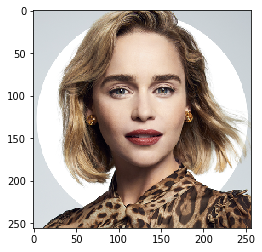

In [23]:
plt.imshow(Image.fromarray(por_col,'RGB'))

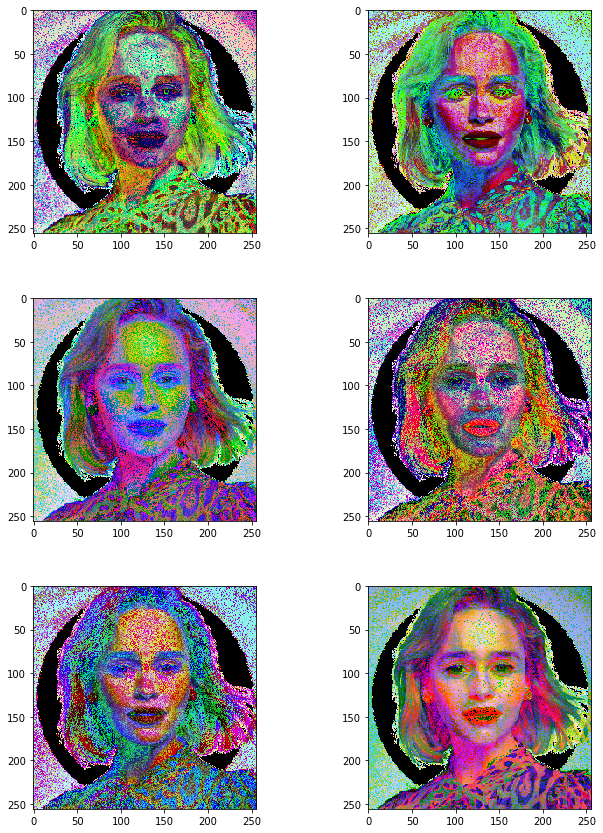

In [24]:
t = plt.subplots(nrows=3, ncols = 2, figsize = (10,15))
ax_list = list(t[1])

ax_list[0][0].imshow(Image.fromarray(por_col_edit_210, 'RGB'))
ax_list[0][1].imshow(Image.fromarray(por_col_edit_012, 'RGB'))
ax_list[1][0].imshow(Image.fromarray(por_col_edit_120, 'RGB'))
ax_list[1][1].imshow(Image.fromarray(por_col_edit_201, 'RGB'))
ax_list[2][0].imshow(Image.fromarray(por_col_edit_021, 'RGB'))
ax_list[2][1].imshow(Image.fromarray(por_col_edit_102, 'RGB'))


plt.subplots_adjust(wspace=0.5)

(array([18039.,   153.,   328.,   592.,   762.,   510.,   611.,   743.,
          827.,   383.,  1305.,   311.,  1150.,   537.,   904.,   403.,
         1761.,   327.,   734.,   295.,  1246.,   728.,   819.,   740.,
          103.,  3359.,   616.,   928.,   706.,   933.,  1256.,   841.,
          317.,  1991.,   616.,  1127.,   491.,  1825.,   678.,   798.,
         1839.,  1168.,  1103.,  1403.,  1438.,  1997.,  1575.,  2270.,
          567.,  1383.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

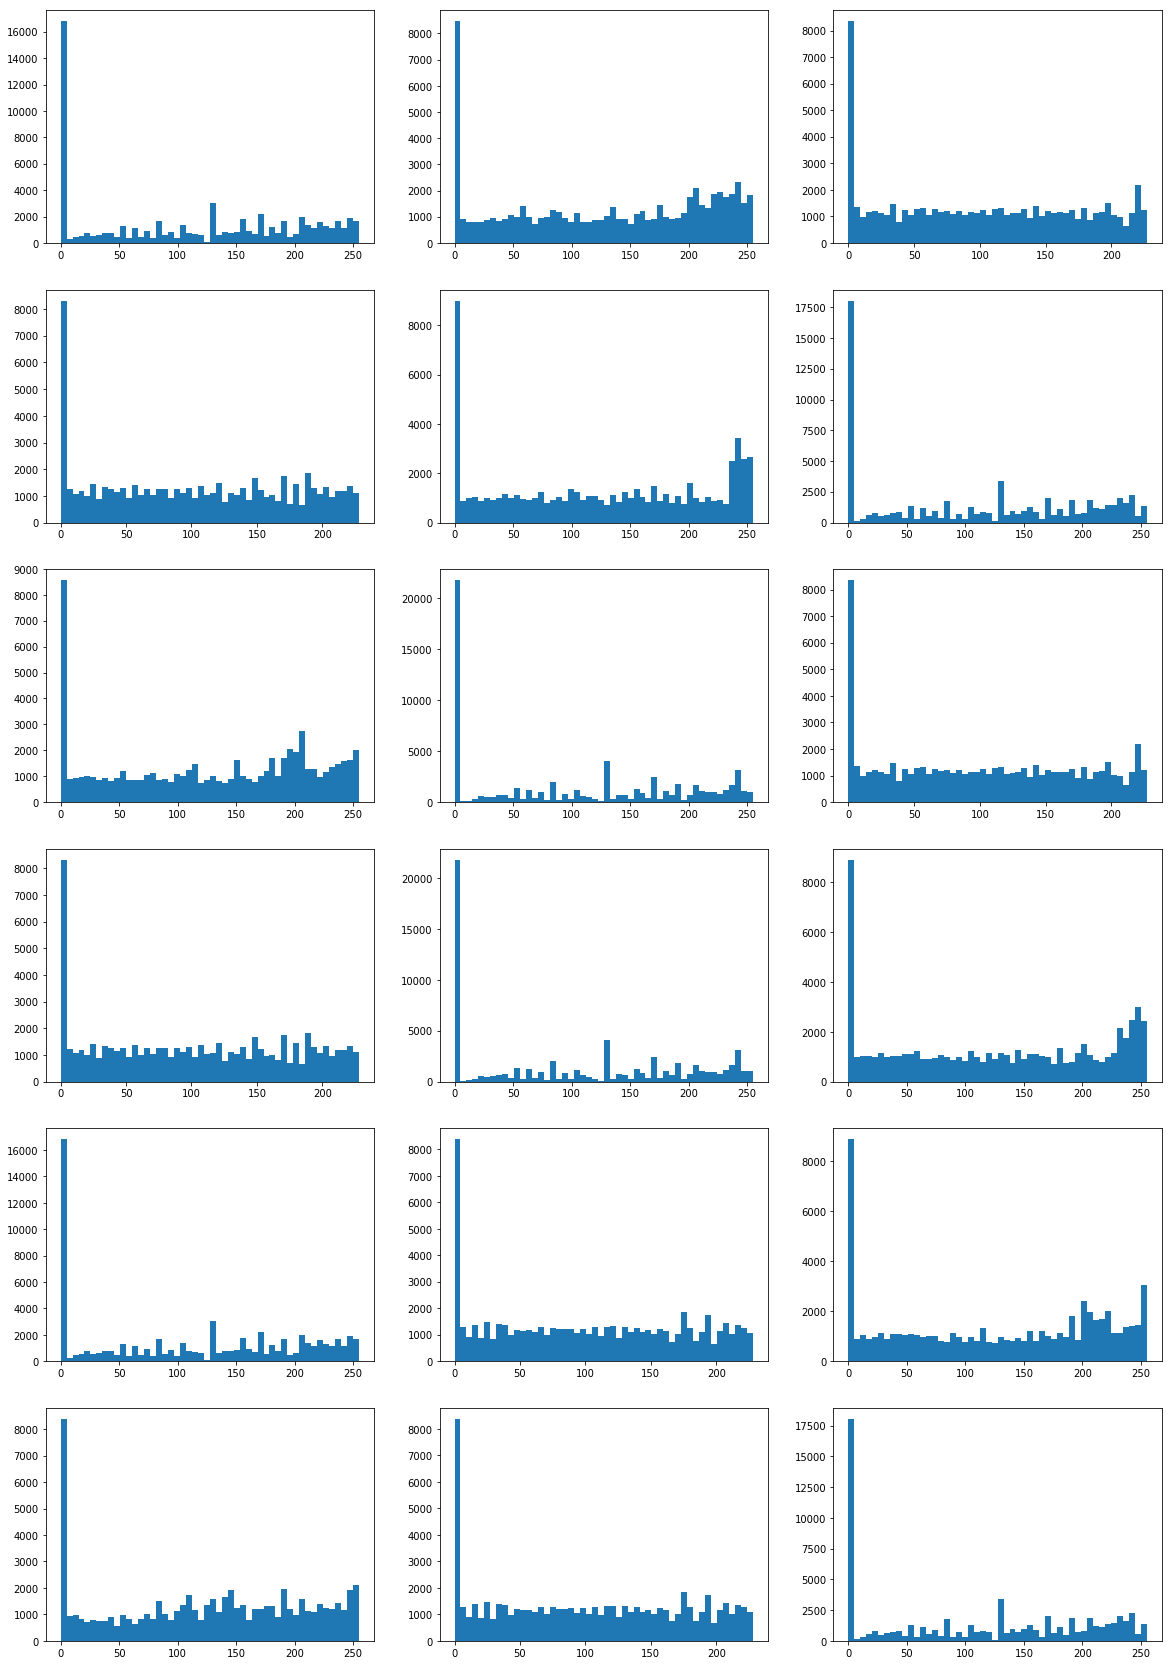

In [36]:
t = plt.subplots(nrows=6, ncols = 3, figsize = (20,30))
ax_list = list(t[1])

ax_list[0][0].hist(por_col_edit_210[:, :, 0].reshape(-1), bins=50)
ax_list[0][1].hist(por_col_edit_210[:, :, 1].reshape(-1), bins=50)
ax_list[0][2].hist(por_col_edit_210[:, :, 2].reshape(-1), bins=50)

ax_list[1][0].hist(por_col_edit_012[:, :, 0].reshape(-1), bins=50)
ax_list[1][1].hist(por_col_edit_012[:, :, 1].reshape(-1), bins=50)
ax_list[1][2].hist(por_col_edit_012[:, :, 2].reshape(-1), bins=50)

ax_list[2][0].hist(por_col_edit_201[:, :, 0].reshape(-1), bins=50)
ax_list[2][1].hist(por_col_edit_201[:, :, 1].reshape(-1), bins=50)
ax_list[2][2].hist(por_col_edit_201[:, :, 2].reshape(-1), bins=50)

ax_list[3][0].hist(por_col_edit_021[:, :, 0].reshape(-1), bins=50)
ax_list[3][1].hist(por_col_edit_021[:, :, 1].reshape(-1), bins=50)
ax_list[3][2].hist(por_col_edit_021[:, :, 2].reshape(-1), bins=50)

ax_list[4][0].hist(por_col_edit_120[:, :, 0].reshape(-1), bins=50)
ax_list[4][1].hist(por_col_edit_120[:, :, 1].reshape(-1), bins=50)
ax_list[4][2].hist(por_col_edit_120[:, :, 2].reshape(-1), bins=50)

ax_list[5][0].hist(por_col_edit_102[:, :, 0].reshape(-1), bins=50)
ax_list[5][1].hist(por_col_edit_102[:, :, 1].reshape(-1), bins=50)
ax_list[5][2].hist(por_col_edit_102[:, :, 2].reshape(-1), bins=50)

# Question 3: Match one with another

In [26]:
def OTmap_match(x,ori,target): 
    musum = ori[ori <= x].shape[0]
    return np.sort(target.reshape(-1))[musum-1]

## The two picked grayscale images

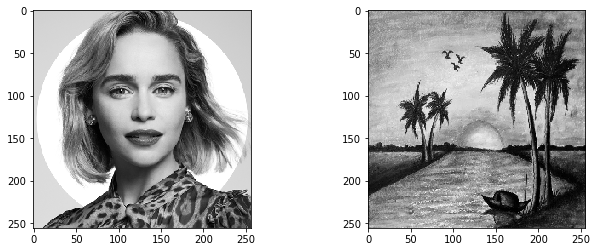

In [34]:
fig, ax_list = plt.subplots(ncols = 2, figsize = (10,4))

ax_list[0].imshow(Image.fromarray(por1, 'L'))
ax_list[1].imshow(Image.fromarray(sce1, 'L'))

plt.subplots_adjust(wspace=0.5)

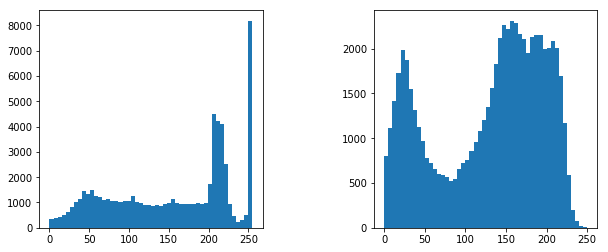

In [37]:
t = plt.subplots(ncols = 2, figsize = (10,4))
ax_list = list(t[1])

ax_list[0].hist(por1.reshape(-1), bins=50)  # arguments are passed to np.histogram
ax_list[1].hist(sce1.reshape(-1), bins=50)

plt.subplots_adjust(wspace=0.5)

In [27]:
por_match = np.array([OTmap_match(x,por1,sce1) for x in por1.reshape(-1)]).reshape(256,256)

## The original image and the edited image

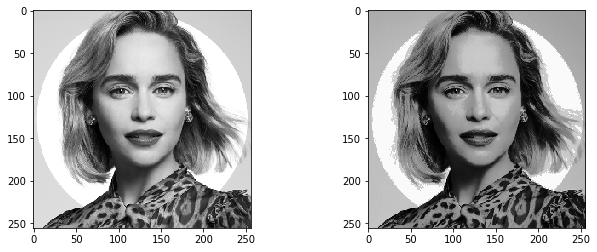

In [28]:
fig, ax_list = plt.subplots(ncols = 2, figsize = (10,4))

ax_list[0].imshow(Image.fromarray(por1, 'L'))
ax_list[1].imshow(Image.fromarray(por_match, 'L'))

plt.subplots_adjust(wspace=0.5)

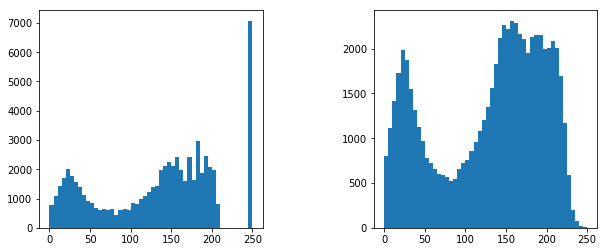

In [38]:
t = plt.subplots(ncols = 2, figsize = (10,4))
ax_list = list(t[1])

ax_list[0].hist(por_match.reshape(-1), bins=50)  # arguments are passed to np.histogram
ax_list[1].hist(sce1.reshape(-1), bins=50)

plt.subplots_adjust(wspace=0.5)